<h1 align=center><font size=5>Data Analysis with Python</font></h1>

1. Model Evaluation
2. Over-fitting, Under-fitting and Model Selection
3. Ridge Regression
4. Grid Search

<p><i>Using: pandas, numpy, sklearn</i></p>
<p><b>Source:</b> Coursera IBM Data Science Certification, Course 6: Data Analysis With Python</p>

In [5]:
import pandas as pd
import numpy as np

In [6]:
# source
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

In [7]:
df = pd.read_csv(path)

In [8]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [9]:
df = df._get_numeric_data()

<h1 id="1">Part 1: Training and Testing</h1>

<p>An important step in testing your model is to split your data into training and testing data. 

We will place the target data <b>price</b> in a separate dataframe <b>y_data</b>:</p>

In [10]:
y_data = df['price']

Drop price data in **x_data**

In [11]:
x_data = df.drop('price', axis=1)

Now we randomly split our data into training and testing data  using the function <b>train_test_split</b>. 

In [12]:
!pip3 install sklearn

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# The test_size parameter sets the proportion of data 
# that is split into the testing set.

x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.15, 
                                                    random_state=1
                                                   )

In [15]:
type(x_train)

pandas.core.frame.DataFrame

In [16]:
print("number of test samples :", x_test.shape[0])

number of test samples : 31


In [17]:
print("number of training samples:",x_train.shape[0])

number of training samples: 170


<h2>Linear Regression</h2>

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lre = LinearRegression()

In [20]:
type(lre)

sklearn.linear_model._base.LinearRegression

In [21]:
# We fit the model using the feature 'horsepower'

lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [22]:
# R^2 of test data

lre.score(x_test[['horsepower']], y_test)

0.707688374146705

In [23]:
# R^2 of training data

lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

<h2>Cross-validation Score</h2>

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
# The parameter cv determines the number of folds

Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [26]:
# Te default scoring is R^2

Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [27]:
# We can calculate the mean/average and standard deviation of our estimate

print("The mean of the folds is ", Rcross.mean())
print("The standard deviation of the folds is ", Rcross.std())

The mean of the folds is  0.522009915042119
The standard deviation of the folds is  0.291183944475603


You can also use the function **cross_val_predict** to predict the output. The function splits up the data into the specified number of folds, using one fold to get a prediction while the rest of the folds are used as training data. First import the function:

In [28]:
from sklearn.model_selection import cross_val_predict

In [32]:
y_data.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [29]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)

In [30]:
type(yhat)

numpy.ndarray

In [34]:
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h1 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h1>

<p>It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world.  One reason for this is overfitting; let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>


In [35]:
# Multiple linear regression objects and train the model
# using 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'

lr = LinearRegression()
lr.fit(
    x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],
    y_train
)

LinearRegression()

In [36]:
# Prediction using training data

yhat_train = lr.predict(
    x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
)

yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [37]:
# Prediction using test data

yhat_test = lr.predict(
    x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
)

yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

<h3>Model evaluation using train and test data separately</h3>

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
type(y_train)
y_train[0:5]

27      8921.0
40     12945.0
89      6849.0
175    15998.0
132    18150.0
Name: price, dtype: float64

In [35]:
type(yhat_train)
yhat_train[0:5]


array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [46]:
df_ytrain = pd.DataFrame()
df_ytrain['car-proportion'] = y_train.index
df_ytrain['actual-values'] = y_train.values
df_ytrain['predicted-values'] = pd.Series(yhat_train)
df_ytrain.set_index('car-proportion', drop=True, inplace=True)
df_ytrain.head()

,actual-values,predicted-values
car-proportion,,
27,8921.0,11927.706998
40,12945.0,11236.716720
89,6849.0,6436.917755
175,15998.0,21890.220650
132,18150.0,16667.182548


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def DistributionPlot(
    RedFunction,
    BlueFunction,
    RedName,
    BlueName,
    Title
):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(
        RedFunction, 
        color="r", 
    )
    ax2 = sns.kdeplot(
        BlueFunction, 
        color="b", 
        ax=ax1
    )

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()
    
def PollyPlot(
    xtrain, 
    xtest, 
    y_train, 
    y_test, 
    lr,
    poly_transform
):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h3>Training Data</h3>

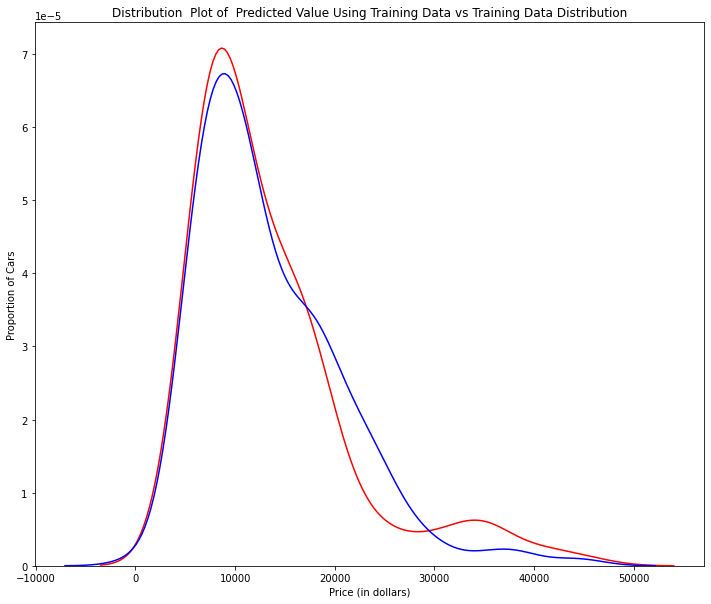

In [48]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

<h3>Test Data</h3>

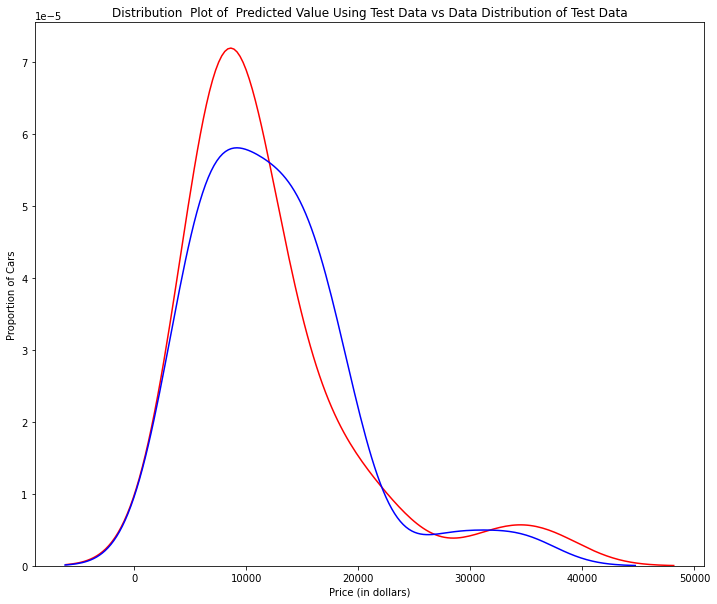

In [49]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

<h2>Overfitting</h2>

<p>Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship.</p>

In [54]:
from sklearn.preprocessing import PolynomialFeatures

# create a degree 5 polynomial model.
x_train, x_test, y_train, y_test = train_test_split(
    x_data, 
    y_data, 
    test_size=0.45, 
    random_state=0
)

# perform a degree 5 polynomial transformation 
# on the feature 'horse power'
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr


# Create a linear regression model "poly" and train it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)


# See the output of our model
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65584216,  7307.98804276, 12213.78788015, 18893.2476361 ,
       19995.95145897])

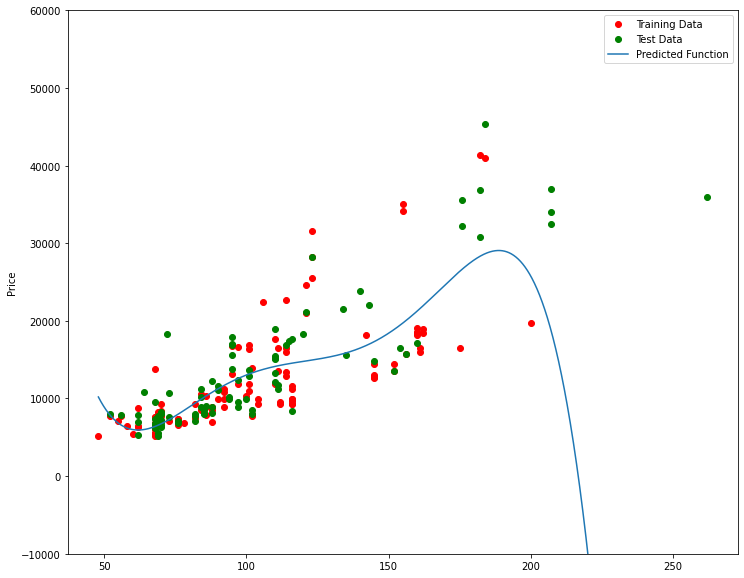

In [55]:
PollyPlot(
    x_train[['horsepower']], 
    x_test[['horsepower']], 
    y_train, 
    y_test, 
    poly,pr
)

In [56]:
# R^2 of the training data
poly.score(x_train_pr, y_train)

0.5567716902126982

In [57]:
# R^2 of the test data
poly.score(x_test_pr, y_test)

-29.871341600352796

<b>The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.</b>

<hr>

Text(3, 0.75, 'Maximum R^2 ')

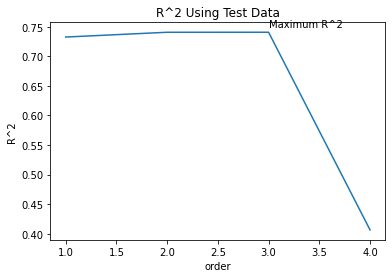

In [59]:
# Let's see how the R^2 changes on the test data 
# for different order polynomials and plot the results:

Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

<b>We see the R^2 gradually increases until an order three polynomial is used. Then the  R^2 dramatically decreases at four.</b>

<hr>

<h2 id="ref3">Part 3: Ridge regression</h2> 

In [60]:
#  Let's perform a degree two polynomial transformation on our data.

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(
    x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']]
)

x_test_pr=pr.fit_transform(
    x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']]
)

In [61]:
from sklearn.linear_model import Ridge

# alpha is the regularization parameter, set to 0.1 
RigeModel=Ridge(alpha=0.1)

RigeModel.fit(x_train_pr, y_train)

/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0.1)

In [63]:
# Obtain a prediction

yhat = RigeModel.predict(x_test_pr)

print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.971514   20836.22326844 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


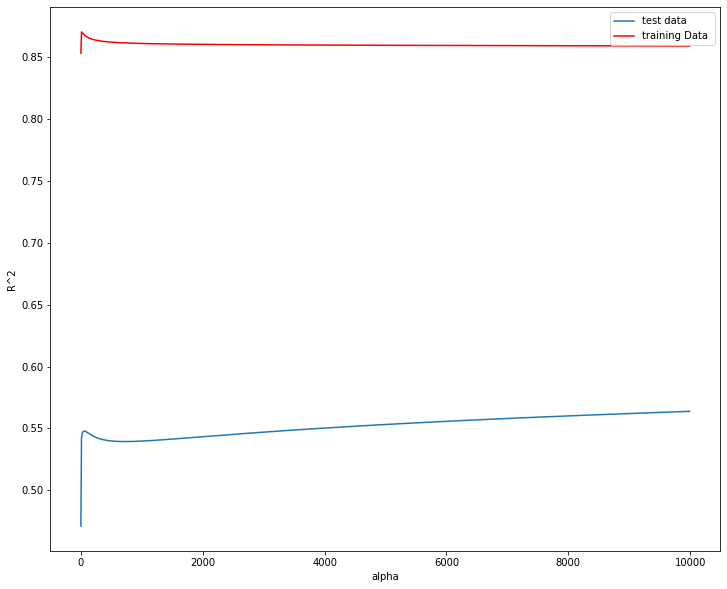

In [65]:
# We select the value of Alpha that minimizes the test error, 
# for example, we can use a for loop. 
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALPHA = 10 * np.array(range(0,1000))
for a in ALPHA:
    RigeModel = Ridge(alpha=a) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))
    

# plot out the value of R^2 for different Alphas 
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALPHA,Rsqu_test, label='test data  ')
plt.plot(ALPHA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

<h2>Grid Search</h2>

In [67]:
from sklearn.model_selection import GridSearchCV

# dictionary of parameter values
parameters1= [{'alpha': [0.001, 0.01, 0.1,1, 10, 100, 1000, 10000, 100000]}]

# ridge regions object
RR=Ridge()

# grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

# fit the model
Grid1.fit(
    x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], 
    y_data
)

# The object finds the best parameter values on the validation data. 
# We can obtain the estimator with the best parameters and assign it 
# to the variable BestRR
BestRR=Grid1.best_estimator_

# We now test our model on the test data 
BestRR.score(
    x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], 
    y_test
)

0.841164983103615